<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Input" data-toc-modified-id="Input-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Input</a></span></li><li><span><a href="#read-metadata-obtained-from-the-NCBI-Virus-Database" data-toc-modified-id="read-metadata-obtained-from-the-NCBI-Virus-Database-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>read metadata obtained from the NCBI Virus Database</a></span></li><li><span><a href="#Basic-information" data-toc-modified-id="Basic-information-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Basic information</a></span><ul class="toc-item"><li><span><a href="#add-host-label" data-toc-modified-id="add-host-label-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>add host label</a></span></li><li><span><a href="#add-virus_ID" data-toc-modified-id="add-virus_ID-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>add virus_ID</a></span></li><li><span><a href="#randomly-sampling-two-sequences-for-each-segment" data-toc-modified-id="randomly-sampling-two-sequences-for-each-segment-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>randomly sampling two sequences for each segment</a></span></li><li><span><a href="#check-no.-of-segment-sequences-for-each-virus-strain" data-toc-modified-id="check-no.-of-segment-sequences-for-each-virus-strain-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>check no. of segment sequences for each virus strain</a></span></li><li><span><a href="#check-sequence-lengths" data-toc-modified-id="check-sequence-lengths-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>check sequence lengths</a></span></li><li><span><a href="#extract->500-bp-sequences" data-toc-modified-id="extract->500-bp-sequences-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>extract &gt;500-bp sequences</a></span></li><li><span><a href="#collection-date-of-viral-data" data-toc-modified-id="collection-date-of-viral-data-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>collection date of viral data</a></span></li></ul></li><li><span><a href="#Divided-data-into-the-Past-and-Future-Viral-Datasets" data-toc-modified-id="Divided-data-into-the-Past-and-Future-Viral-Datasets-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Divided data into the Past and Future Viral Datasets</a></span></li><li><span><a href="#output" data-toc-modified-id="output-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>output</a></span></li></ul></div>

In [3]:
#!/usr/bin/env python
import sys, re
argvs = sys.argv
sys.setrecursionlimit(10000000)

import os
import collections
import numpy as np
import pandas as pd
import array
pd.set_option("display.max_colwidth", 200)
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 300)

import glob

## visualize
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.rcParams['font.family'] = "Arial"

# Input

In [4]:
virus_family="Hantaviridae"
segment_no = 0

# read metadata obtained from the NCBI Virus Database

In [7]:
##
info_f = "/".join(map(str, ["input_examples", virus_family + ".csv"]))

df_info = pd.read_csv(info_f)
df_info.head(3)

,Accession,Organism_Name,SRA_Accession,Submitters,Organization,Org_location,Release_Date,Isolate,Species,Genus,Family,Molecule_type,Length,Sequence_Type,Nuc_Completeness,Genotype,Segment,Publications,Geo_Location,Country,USA,Host,Isolation_Source,Collection_Date,BioSample,GenBank_Title
0,NC_077666.1,Puumala orthohantavirus,NaN,"Giebel,L.B., Stohwasser,R., Zoller,L., Bautz,E.K., Darai,G.","National Center for Biotechnology Information, NIH",USA,2023-05-06T00:00:00Z,NaN,Puumala orthohantavirus,Orthohantavirus,Hantaviridae,ssRNA(-),3682,RefSeq,complete,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Puumala virus CG1820 virus M genome segment, complete cds"
1,NC_077667.1,Puumala orthohantavirus,NaN,"Stohwasser,R., Raab,K., Darai,G., Bautz,E.K.","National Center for Biotechnology Information, NIH",USA,2023-05-06T00:00:00Z,NaN,Puumala orthohantavirus,Orthohantavirus,Hantaviridae,ssRNA(-),6550,RefSeq,complete,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Puumala virus CG1820 RNA-dependent RNA polymerase gene in L RNA segment
2,NC_077668.1,Puumala orthohantavirus,NaN,"Stohwasser,R., Giebel,L.B., Zoller,L., Bautz,E.K., Darai,G.","National Center for Biotechnology Information, NIH",USA,2023-05-06T00:00:00Z,NaN,Puumala orthohantavirus,Orthohantavirus,Hantaviridae,ssRNA(-),1784,RefSeq,complete,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Puumala virus CG1820 segment S nucleocapsid protein mRNA, 5' end"


# Basic information

## add host label

In [9]:
df_info["host_label"] = 0
df_info["Host"] = df_info["Host"].fillna("NA")
df_info.loc[df_info["Host"].str.contains("Homo"), "host_label"] = 1
df_info.loc[df_info["Host"].str.lower() == "human", "host_label"] =1

## add virus_ID

In [12]:
uniq_col_l = ["Accession", "Length", "GenBank_Title", "Host", "Segment"]
metadata_col_l = list(set(df_info.columns.tolist()) - set(uniq_col_l))

print (len(metadata_col_l))
print (metadata_col_l)

col_l = metadata_col_l + ["Accession", "Segment"]

df_info_1 = df_info.loc[:, col_l]
df_info_g = df_info_1.groupby(metadata_col_l, as_index=False, dropna=False).agg(
    count=("Accession", "size"), segment=("Segment", "nunique"))

df_info_g["virus_ID"] = [";".join(map(str, [virus_family, i])) for i in df_info_g.index.tolist()]

22
['Publications', 'Organization', 'Family', 'Collection_Date', 'Org_location', 'Country', 'USA', 'Species', 'Geo_Location', 'Isolation_Source', 'Submitters', 'SRA_Accession', 'Genus', 'Genotype', 'Release_Date', 'host_label', 'Isolate', 'Sequence_Type', 'Organism_Name', 'Nuc_Completeness', 'BioSample', 'Molecule_type']


## randomly sampling two sequences for each segment

In [15]:
import random
random.seed(7)

df_info_virusID = df_info_g.set_index("virus_ID")

df_virus_ID.loc[df_virus_ID["Segment"].isnull(), "Segment"] = "unassigned"

index_l = []
for virus_ID in df_virus_ID["virus_ID"].unique():
    count = df_info_virusID.loc[virus_ID, "count"]
    df = df_virus_ID[df_virus_ID["virus_ID"] == virus_ID]
    if count < 4:
        index_l.extend(df.index.tolist())
    else:
        for segment in df["Segment"].unique():
            df_1 = df[df["Segment"] == segment]
            df_1 = df_1.sort_values("Length", ascending=False)
            l = df_1.index.tolist()[:2]
            index_l.extend(l)
    
#             if virus_ID == "Arenaviridae;681":
#                 print (segment, l)

df_sampled = df_virus_ID.iloc[index_l, :]

## check no. of segment sequences for each virus strain

<Axes: xlabel='segment', ylabel='Count'>

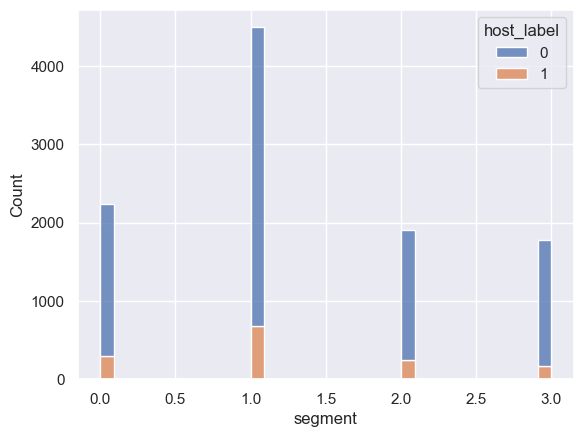

In [17]:
sns.histplot(data=df_sampled, x="segment", hue="host_label", multiple="stack")

## check sequence lengths

<Axes: xlabel='Length', ylabel='Count'>

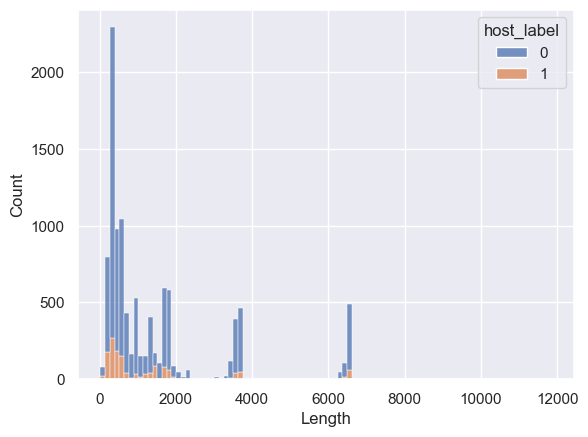

In [19]:
sns.histplot(data=df_sampled, x="Length", hue="host_label", multiple="stack")

## extract >500-bp sequences

In [20]:
df_sampled_length = df_sampled[df_sampled["Length"] > 500]

## collection date of viral data

<Axes: xlabel='collection_year', ylabel='Count'>

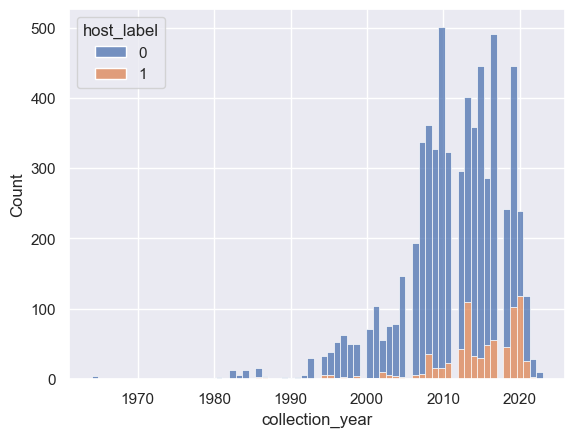

In [24]:
import datetime
def extract_year(c_date, r_date):
    if re.fullmatch(r'[0-9]{4}', date):
        year = date
    elif "-" in str(date):
        year = date.split("-")[0]
    else:
        pass
    return (year)
        
df_sampled_length = df_sampled_length.astype({"Collection_Date":str})
df_sampled_length["collection_year"] = pd.to_datetime(df_sampled_length["Collection_Date"], utc=True).dt.year
df_sampled_length.loc[df_sampled_length["collection_year"].isnull(), 
                  "collection_year"] = pd.to_datetime(df_sampled_length["Release_Date"], utc=True).dt.year

sns.histplot(data=df_sampled_length, x="collection_year", hue="host_label", multiple="stack")

# Divided data into the Past and Future Viral Datasets

In [25]:
df_sampled_length["dataset"] = "known"
df_sampled_length.loc[df_sampled_length["collection_year"] >= 2018, "dataset"] = "unknown"

In [26]:
df_sampled_length.groupby(["dataset", "host_label"]).agg(seq_no=("virus_ID", "nunique"))

seq_no
dataset host_label        
known   0             4768
        1              473
unknown 0              789
        1              295

# output

In [51]:
output_f = "/".join(map(str, ["output_examples", virus_family + ".curated.csv"]))

df_info_2.to_csv(output_f, sep="\t", index=False)